# Testing Slope Fitting on Synthetic PSDs

Note: This notebook uses py2.7, for FOOF

In [1]:
# This notebook uses py2.7 - because that's what FOOF is written in
from __future__ import print_function, division

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Custom code imports
from slf.fit import *

In [4]:
# Import FOOF (use sys to add location to path, then import)
import sys
sys.path.append('/Users/thomasdonoghue/Documents/GitCode/')
#from foof.fit import FOOF
from foof import syn

In [5]:
# Generate synthetic PS
fs, psd = syn.mfonef(
    mf=[10],
    mf_sig=[1],
    mk=[0.2],
    chi=1,
    f0=3,
    fmax=40,
    res=0.5,
    noi=0.05
)

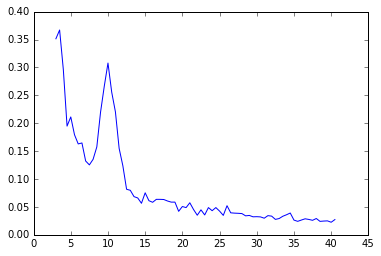

In [6]:
plt.plot(fs, psd)

In [7]:
fsl_rlm(fs, psd)

-1.0472019486394346

In [8]:
fsl_rlm_alph(fs, psd)

-1.0266635807909239

In [9]:
fsl_rlm_oscs(fs, psd)

-1.0144211277806345

In [10]:
fsl_ransac(fs, psd)

-1.0246653399807291

In [11]:
fsl_ransac_alph(fs, psd)

-1.0201927529954034

In [12]:
fsl_ransac_oscs(fs, psd)

-1.0119791541620005